<a href="https://colab.research.google.com/github/mayujie/MSC_text_mining/blob/master/RD_dataprepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Amazon product data](http://jmcauley.ucsd.edu/data/amazon/index_2014.html)
# [Amazon product data Julian McAuley, UCSD](http://jmcauley.ucsd.edu/data/amazon/)
Files

"Small" subsets for experimentation


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
root_path = '/content/drive/My Drive/Colab/MSC_RD'
root_path

'/content/drive/My Drive/Colab/MSC_RD'

## **Read from text file**

In [ ]:
### download text data
!gdown https://drive.google.com/uc?id=1PtUMY6KuShzR2lk_85VbNizGT_wciBNl

Downloading...
From: https://drive.google.com/uc?id=1PtUMY6KuShzR2lk_85VbNizGT_wciBNl
To: /content/reviews_text.zip
117MB [00:01, 88.6MB/s]


In [ ]:
!unzip reviews_text.zip

Archive:  reviews_text.zip
  inflating: reviews_text.txt        


In [ ]:
!rm /content/reviews_text.zip

In [ ]:
!ls -lh *.txt

-rw-r--r-- 1 root root 303M Nov 13 11:58 reviews_text.txt


In [ ]:
handle_list = []
with open('/content/reviews_text.txt', 'r') as file:
  for line in file:
    handle_list.append(line)

In [ ]:
## each element in list has \n at the end
print(len(handle_list))
handle_list[1]

484826


'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.\n'

In [ ]:
handle_list[:5]

["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.\n",
 'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.\n',
 "This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.\n",
 'Mysteries are interesting.  The tension between Robson and the tall blond is good but not always believable.  She often seemed uncomfortable.\n',
 'This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out

## remove newline '\n' from each row

In [ ]:
text_ls = map(lambda s: s.strip(), handle_list)
text_ls = list(text_ls)
text_ls[:5]

["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.",
 'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.',
 "This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.",
 'Mysteries are interesting.  The tension between Robson and the tall blond is good but not always believable.  She often seemed uncomfortable.',
 'This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in a no

In [ ]:
## read data into dataframe
import pandas as pd
df_review = pd.DataFrame(text_ls) 
df_review

,0
0,I had big expectations because I love English ...
1,I highly recommend this series. It is a must f...
2,This one is a real snoozer. Don't believe anyt...
3,Mysteries are interesting. The tension betwee...
4,"This show always is excellent, as far as briti..."
...,...
484821,Super bright! Awesomely Comfortable. Easy to u...
484822,I got this headlamp for my daughter since we r...
484823,This is a real bright headlamp. I bought it f...
484824,Easy to wear headlamp that's bright. Good for ...


In [ ]:
del handle_list

## check the length of characters each row, and find max & min len of characters

In [ ]:
## check 1st row in df_review
len(df_review.values[0][0])

159

In [ ]:
## put all the characters length of rows into list
len_review = []

for raw in df_review.values:
  len_review.append(len(raw[0]))

In [ ]:
len_review[:10]

[159, 186, 134, 141, 1300, 3039, 99, 348, 186, 127]

In [ ]:
## find the max and min characters length
max(len_review), min(len_review)

(32437, 0)

In [ ]:
## return the index of max and min characters length
len_review.index(max(len_review)), len_review.index(min(len_review))

(151972, 37144)

In [ ]:
## put in the founded index and check it's the same as before
len_review[151972], len_review[37144]

(32437, 0)

In [ ]:
print(len(df_review.values[151972][0]))
df_review.values[151972][0]

32437


"UPDATE, 12/09/13: this machine is WAY OVERPRICED, now.  I got mine for maybe $400, will check and write an updated note in the comments.  It wasn't worth the amount I paid, much less the selling price now.UPDATE 12/09/13: I finally gave up and reinstalled my prior MFC 9700.  It scans well.  This 8480DN cannot scan directly from the machine, but ONLY from the computer.  However, at least the 8480DN has a power button, along with wire hookup in two ways, parallel and USB.  It also allows you to configure it from the computer, without having to use that HORRIBLE LCD menu.  But I gotta tell ya, I'll never buy another Brother printer again.  They didn't learn any lessons from the insanity of the MFC 9700's frustrating interface.UPDATE 3/22/13:  I upgraded one star for the printer, because there is a way to make it do searchable pdf via its PaperPort function.  But the scanner itself can't do that.  YOU can do tht, if you have Acrobat;  its OCR function will also convert any Google doc into

In [ ]:
## for this row with max characters length, after spliting this row has 5803 wors
print(df_review.values[151972][0].split()[:20])
len(df_review.values[151972][0].split())

['UPDATE,', '12/09/13:', 'this', 'machine', 'is', 'WAY', 'OVERPRICED,', 'now.', 'I', 'got', 'mine', 'for', 'maybe', '$400,', 'will', 'check', 'and', 'write', 'an', 'updated']


5494

In [ ]:
## this row was empty
print(len(df_review.values[37144][0]))
df_review.values[37144][0]

0


''

In [ ]:
# count how many rows are empty
count_zero = 0

for raw in df_review.values:
  if len(raw[0]) == 0:
    count_zero += 1

In [ ]:
# there are 224 rows with empty reviews
count_zero

134

In [ ]:
## put empty index of row into list
review_zero = []

for i, raw in enumerate(df_review.values):
  if len(raw[0]) == 0:
    review_zero.append((i, raw))

print(review_zero[:15])
len(review_zero)

[(37144, array([''], dtype=object)), (39355, array([''], dtype=object)), (43811, array([''], dtype=object)), (44732, array([''], dtype=object)), (47060, array([''], dtype=object)), (48565, array([''], dtype=object)), (62118, array([''], dtype=object)), (125232, array([''], dtype=object)), (126706, array([''], dtype=object)), (131044, array([''], dtype=object)), (131480, array([''], dtype=object)), (131611, array([''], dtype=object)), (131618, array([''], dtype=object)), (131647, array([''], dtype=object)), (132735, array([''], dtype=object))]


134

In [ ]:
import numpy as np

np.asarray(len_review)

array([159, 186, 134, ..., 442, 239, 391])

Text(-8.950000000000003, 0.5, 'Len')

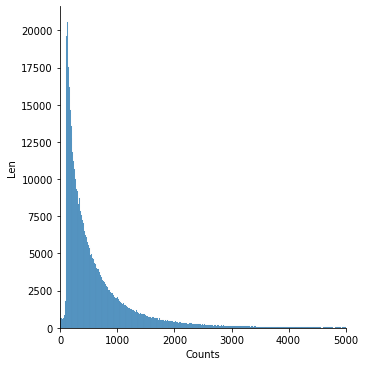

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(np.asarray(len_review))

plt.xlim(-10, 5000)
plt.xlabel('Counts')
plt.ylabel('Len')

In [ ]:
%whos

Variable      Type             Data/Info
----------------------------------------
count_zero    int              134
df_review     DataFrame                                 <...>[484826 rows x 1 columns]
drive         module           <module 'google.colab.dri<...>s/google/colab/drive.py'>
file          TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
i             int              484825
len_review    list             n=484826
line          str              Very nice head lamp! Brig<...>and flashing modes too.\n
np            module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd            module           <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
raw           ndarray          1: 1 elems, type `object`, 8 bytes
review_zero   list             n=134
root_path     str              /content/drive/My Drive/Colab/MSC_RD
sns           module     

In [ ]:
del count_zero

In [ ]:
def check_part(start, end, data):
  print(data.values[start:end])

In [ ]:
check_part(0, 500, df_review)

[["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all."]
 ['I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.']
 ["This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you."]
 ['Mysteries are interesting.  The tension between Robson and the tall blond is good but not always believable.  She often seemed uncomfortable.']
 ['This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made.  The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines.  This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in

In [ ]:
check_part(484826 -500, 484826 , df_review)

[["This is far too small to be an effective closet light. You'd want to use several of these to accomplish that task, so this won't really work for my needs of our hallway coat closet without a light in it.It works, but it's not bright enough to be the sole light source. I would probably want 3 of these (one top and one on each side of the doorframe) to effectively light up the coat closet.If it was pitch black this works well as a nightlight (which is what we're using it for now), but not robust enough for much more."]
 ["This structured media wiring enclosure is made of a composite instead of the more traditional metal cases from leviton or other manufacturers on the market.  The goal of this construction is to enable the homeowner to keep your main home gateway router and wireless access point inside the enclosure without having signals impacted by the enclosure material.  And it works as advertised.The enclosure is 35&#34;x20&#34;x5&#34; with stud 'wings for easy mounting.  The dep

stopwards removal will not consider in this case 

In [ ]:
# from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
# stopwords_list = stopwords.words('english')
# print(stopwords_list)
# len(stopwords_list)

About [contractions](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

https://stackoverflow.com/questions/44865840/how-to-treat-numbers-inside-text-strings-when-vectorizing-words

https://www.w3schools.com/python/python_regex.asp#findall

https://stackoverflow.com/questions/46931715/missing-word-in-word-embedding

https://stackoverflow.com/questions/53837088/embedding-vs-inserting-word-vectors-directly-to-input-layer

https://www.rexegg.com/regex-quickstart.html

# Preprocess data

https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

In [ ]:
%whos

Variable      Type             Data/Info
----------------------------------------
check_part    function         <function check_part at 0x7f4b08acaa60>
df_review     DataFrame                                 <...>[484826 rows x 1 columns]
drive         module           <module 'google.colab.dri<...>s/google/colab/drive.py'>
file          TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='UTF-8'>
i             int              484825
len_review    list             n=484826
line          str              Very nice head lamp! Brig<...>and flashing modes too.\n
np            module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd            module           <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
raw           ndarray          1: 1 elems, type `object`, 8 bytes
review_zero   list             n=134
root_path     str              /content/drive/My Drive/Co

In [ ]:
## clean text
import re


def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string) ## replace punctuation only keep (),!?'`
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string) ## two space

    return string.strip().lower()

In [ ]:
text_review = [clean_str(sent[0]) for sent in df_review.values]

## compare after clean_str function

In [ ]:
text_review[485:500]

['i was hooked after the first episode i love the concept a blood splatter expert who seconds as a serial killer that preys upon other serial killers michael c hall seems as if he was born to play the role of dexter every season there seems to be one central character that dexter must hunt down , amongst various other serial killers and murders that end up getting chopped up on his table this season follows dexter 8217 s pursuit of the ice truck killer 8212 a sadistic serial killer that chops bodies into pieces after draining all of their blood he 8217 s named the ice truck killer because it is believed that he drives around in an ice truck before dumping the bodies off great pilot season if you have not seen this show , this is definitely one you do not want to miss',
 "this is n't one of those shows or movies about a serial killer who just does it for fun dexter morgan targets people very specifically and only those whom he believes have crossed a line or violated one of his standard

In [ ]:
text_ls[485:500]

['I was hooked after the first episode.  I love the concept: a blood splatter expert who seconds as a serial killer that preys upon other serial killers.  Michael C. Hall seems as if he was born to play the role of Dexter.  Every season there seems to be one central character that Dexter must hunt down, amongst various other serial killers and murders that end up getting chopped up on his table.  This season follows Dexter&#8217;s pursuit of the Ice Truck Killer&#8212;a sadistic serial killer that chops bodies into pieces after draining all of their blood.  He&#8217;s named the Ice Truck Killer because it is believed that he drives around in an ice truck before dumping the bodies off.  Great pilot season.  If you have not seen this show, this is definitely one you do not want to miss.',
 "This isn't one of those shows or movies about a serial killer who just does it for fun.  Dexter Morgan targets people very specifically and only those whom he believes have crossed a line or violated 

## Find url in reviews (1st clean) category token

In [ ]:
import re

In [ ]:
def find_noise(reg, datalist):
  count = 0
  found_list = []

  for i, row in enumerate(datalist):
    found = re.findall(reg, row)

    if found != []:
      count += 1
      found_list.append((i ,found))

  return count, found_list

In [ ]:
count_url, found_url = find_noise(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", text_ls)

In [ ]:
print(count_url, len(found_url))
## found 270 not good!,692
found_url[:100]

692 692


[(2167,
  [('http://batmantheanimatedseries.wikia.com/wiki/Robinandhttp://batmantheanimatedseries.wikia.com/wiki/Batgirlinclude',
    '',
    '',
    '',
    '')]),
 (4065,
  [('http://www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6',
    '',
    '',
    '',
    '')]),
 (6236,
  [('http://www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt',
    '',
    '',
    '',
    '')]),
 (7606,
  [('http://www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title',
    '',
    '',
    '',
    '')]),
 (8325, [('hate...love/hate', '', '', '', '')]),
 (11452,
  [('http://www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title',
    '',
    '',
    '',
    '')]),
 (25479,
  [('http://www.snopes.com/photos/supernatural/mermaids.asp',
    '',
    '',
    '',
    '')]),
 (33103, [('http://youtu.be/fYn1vVjCefE?t=1m40s

In [ ]:
# text_ls[8325]
# text_ls[115350]

In [ ]:
count_url_2, found_url_2 = find_noise(r'http.?://[^\s]+[\s]?', text_ls)

In [ ]:
print(count_url_2, len(found_url_2))
## found 166 good for url start with http & https ......, 509
found_url_2[:15]

509 509


[(2167,
  ['http://batmantheanimatedseries.wikia.com/wiki/Robinandhttp://batmantheanimatedseries.wikia.com/wiki/Batgirlinclude ']),
 (4065, ['http://www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6']),
 (6236,
  ['http://www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt']),
 (7606,
  ['http://www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title']),
 (11452,
  ['http://www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title']),
 (25479, ['http://www.snopes.com/photos/supernatural/mermaids.asp']),
 (33103, ['http://youtu.be/fYn1vVjCefE?t=1m40s). ']),
 (37428,
  ['http://www.amazon.com/gp/product/B000XTMGTG/ref=oh_details_o01_s00_i00']),
 (38865,
  ['http://www.amazon.com/Waxman-4215495N-2-Inch-Bumper-Square/dp/B001WAK6E2/ref=pd_sim_indust_3 ']),
 (39465,
  ['http://www.amazon.com/gp/product/B002

In [ ]:
# text_ls[45169]

In [ ]:
count_url_3, found_url_3 = find_noise(r'www\.[^\s|\.|\"].?[^\s\"\>\)]+', text_ls)
print(count_url_3, len(found_url_3))
## found 154, 470 ## good for www. url
found_url_3[:10]
# found_url_3[700:]

470 470


[(4065, ['www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6']),
 (6236,
  ['www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt']),
 (7606, ['www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title']),
 (11452, ['www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title']),
 (25479, ['www.snopes.com/photos/supernatural/mermaids.asp']),
 (37428, ['www.amazon.com/gp/product/B000XTMGTG/ref=oh_details_o01_s00_i00']),
 (38865,
  ['www.amazon.com/Waxman-4215495N-2-Inch-Bumper-Square/dp/B001WAK6E2/ref=pd_sim_indust_3']),
 (39465, ['www.amazon.com/gp/product/B002XL2IEA/ref=oh_details_o00_s01_i01']),
 (41364, ['www.myscantool.com/dtc/powertrain.htmlmy']),
 (41461,
  ['www.amazon.com/Valterra-F02-4100-45%C2%B0-RV-Hydroflush/product-reviews/B0002UHVAA/ref=cm_cr_dp_synop?ie=UTF8&showViewpoints;=0&sortBy;=bySubmis

In [ ]:
# text_ls[41461]

In [ ]:
# good for youtube.com.....
count_url_3, found_url_3 = find_noise(r'youtube\.com[^\s\)]+', text_ls)
print(count_url_3, len(found_url_3))
## found 5, 13
found_url_3[:10]

13 13


[(36575, ['youtube.com/watch?v=uoqmQY9akJ4']),
 (56402, ['youtube.com/watch?v=ECo3cWRCOZQ']),
 (138870, ['youtube.com/watch?v=OXZ-VN6vAZw[...]']),
 (148287, ['youtube.com/watch?v=OXZ-VN6vAZw']),
 (197730, ['youtube.com/watch?v=Wucog5E5eDE']),
 (229295, ['youtube.com/watch?v=cv5RwxYW8yA']),
 (368008,
  ['youtube.com\\im14pinballThis',
   'youtube.com\\im14pinballor',
   'youtube.com/im14pinballThanks!!']),
 (369264, ['youtube.com/watch?v=vI3jgkhxxPE']),
 (423664, ['youtube.com\\im14pinballThis']),
 (437227, ['youtube.com\\im14pinballI', 'youtube.com\\im14pinball'])]

In [ ]:
## found 1739, 172
# count_url_4, found_url_4 = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s].?[^\s]+', text_ls)
## found 1721, 174
# count_url_4, found_url_4 = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s]+|youtube\.com[^\s|\.|\,\)]+', text_ls)

## good for url start with www. http https youtube.com
count_url_4, found_url_4 = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s\"\>\)]+|youtube\.com[^\s\)]+', text_ls)

print(count_url_4, len(found_url_4))
## found 1728 ## ## good for url start with www. http https youtube.com ## 174, 536
found_url_4[:100]
# found_url_4[:600]
# found_url_4[600:1200]
# found_url_4[1200:]

536 536


[(2167,
  ['http://batmantheanimatedseries.wikia.com/wiki/Robinandhttp://batmantheanimatedseries.wikia.com/wiki/Batgirlinclude ']),
 (4065, ['http://www.amazon.com/Burning-Plain/dp/B002N4QCTE/ref=pd_ys_ir__6']),
 (6236,
  ['http://www.forbes.com/sites/suwcharmananderson/2012/08/28/fake-reviews-amazons-rotten-core/http://www.wikihow.com/Spot-a-Fake-Review-on-Amazon.Comhttp://www.theguardian.com/world/2013/sep/23/new-york-fake-online-reviews-yoghurt']),
 (7606,
  ['http://www.amazon.com/gp/product/B004EKMIIY/ref=cm_cr_rev_prod_title']),
 (11452,
  ['http://www.amazon.com/gp/product/B006I0GSZM/ref=cm_cr_rev_prod_title']),
 (25479, ['http://www.snopes.com/photos/supernatural/mermaids.asp']),
 (33103, ['http://youtu.be/fYn1vVjCefE?t=1m40s). ']),
 (36575, ['youtube.com/watch?v=uoqmQY9akJ4']),
 (37428,
  ['http://www.amazon.com/gp/product/B000XTMGTG/ref=oh_details_o01_s00_i00']),
 (38865,
  ['http://www.amazon.com/Waxman-4215495N-2-Inch-Bumper-Square/dp/B001WAK6E2/ref=pd_sim_indust_3 ']),
 (3

In [ ]:
import re
text_clean = []

for row in text_ls:
  text_clean.append(re.sub(r"http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s\"\>\)]+|youtube\.com[^\s\)]+", "", row))

In [ ]:
# count_url_clean, found_url_clean = find_noise(r'http.?://[^\s]+[\s]?|www\.[^\s|\.|\"].?[^\s\"\>\)]+|youtube\.com[^\s\)]+', text_clean)

count_url_clean, found_url_clean = find_noise(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", text_clean)
## found rest 583, 98, 163 ## good url like 
print(count_url_clean, len(found_url_clean))
found_url_clean

163 163


[(8325, [('hate...love/hate', '', '', '', '')]),
 (40992, [('buy.EDIT/UPDATE', '', '', '', '')]),
 (50916, [('weight.Fit/Finish', '', '', '', '')]),
 (52100, [('actron.com/downloads/Fifth', '', '', '', '')]),
 (57341, [('automatic.com/cars', '', '', '', '')]),
 (57342, [('automatic.com/apps', '', '', '', '')]),
 (67392, [('rap...rock/metal', '', '', '', '')]),
 (68264, [('such.AC/DC', '', '', '', '')]),
 (69621, [('grand....Rock/Pop', '', '', '', '')]),
 (72850, [('T.N.T.AC/DC', '', '', '', '')]),
 (75611, [('list.Hits/Chart', '', '', '', '')]),
 (77644, [('blazemonger.com/gg', '', '', '', '')]),
 (81407, [('WWW.COM', '', '', '', '')]),
 (84127, [('WWW.Thug.Com', '', '', '', '')]),
 (94599, [('J.Lo/Richard', '', '', '', '')]),
 (99177, [('others.Rap/Rock', '', '', '', '')]),
 (101084, [('55.In/Out', '', '', '', '')]),
 (102449, [('listen.to/wwsu', '', '', '', '')]),
 (105961, [('dr.dre/ice', '', '', '', '')]),
 (107463, [('alt.rock/indie', '', '', '', '')]),
 (108234, [("v.good/average

## Find email in reviews (2nd clean) combine as mention

In [ ]:
## [\w\.-]+@[\w\.-]+\.\w+
## [\w\.-]+@[\w\.-]+
count_em, found_em = find_noise(r'[\w\.-]+@[\w\.-]+\.\w+|[\w\.-]+@[\w\.-]+', text_ls)

In [ ]:
print(count_em, len(found_em))
## found 1599, 109, 144 good
found_em[:30]

144 144


[(10803, ['too.@hg47']),
 (15960, ['wh@res', 'wh@res...why']),
 (16506, ['Jack@ss']),
 (18173, ['bad@ss']),
 (20340, ['outcome.@hg47']),
 (22216, ['d@mn']),
 (31397, ['Bad@ss']),
 (35393, ['t0t@l-b']),
 (35602, ['A@E']),
 (36431, ['bad@ss']),
 (45487, ['C23flyboy@msn.com']),
 (50753, ['OBX411@HOTMAIL.COM']),
 (57176, ['enquiry@pretmanns.com']),
 (58169, ['ailuv@suomi24.fi']),
 (58197, ['yuckplace@hotmail.com']),
 (58218, ['yuckplace@hotmail.com']),
 (59608, ['crome06@hotmail.com']),
 (59612, ['yuckplace@hotmail.com']),
 (60901, ['r@b', 'r@b']),
 (62475, ['wstrnlibwarrior@yahoo.com']),
 (62897, ['milesdeadahead@yahoo.com']),
 (62966, ['chrisbct@hotmail.com']),
 (63755, ['bad@ss', 'half-@ssed']),
 (65217, ['chrisbct@hotmail.com']),
 (66194, ['d@mn']),
 (66426, ['r@b']),
 (67443, ['gg@s']),
 (68712, ['MANSLORTA@NETZERO.com']),
 (69340, ['chrisbct@hotmail.com']),
 (71634, ['cddude24@yahoo.com'])]

## Find mentions (@...) (3rd clean) combine as mention

In [ ]:
count_men, found_men = find_noise(r'@\w+', text_ls)

In [ ]:
print(count_men, len(found_men))
## found 2317, 167, 251
found_men[:10]

251 251


[(3241, ['@ch']),
 (6228, ['@hg47']),
 (7994, ['@hg47']),
 (10323, ['@twisted_twins']),
 (10710, ['@hg47']),
 (10803, ['@hg47']),
 (10836, ['@hg47']),
 (15960, ['@res', '@res']),
 (16506, ['@ss']),
 (18173, ['@ss'])]

## Find dollor sign in reviews (found best regex) ((4th clean))

In [ ]:
## not good
count_doll, found_doll = find_noise(r'\$[^\]]+', text_ls)
print(count_doll, len(found_doll))
found_doll[:10]

20435 20435


[(49,
  ["$25!! Way pumped!The discs were clean, no scratches, worked perfectly. No problems at allAs for the first seasons of it's always sunny, you either like it or you don't. I used to hate this show, but it's now one of my favorite shows. If you haven't seen it yet, then get on it player!"]),
 (225,
  ["$29! I'd rather buy two copies of Season 1! How do I pick zero stars?"]),
 (288,
  ['$$ nature, and the plot continues to thicken with "The Company". I\'ll warn you, you\'re not going to want to stop here, you might want to just get the entire collection and take a vacation so you can watch it all.']),
 (593, ['$9.00 each right around Christmas the last couple years.']),
 (705,
  ['$2 million goal in the first day of the campaign and went on to triple the thing at $5.7 million. The behind-the-scenes story is so feel good. Veronica Mars, the movie, is essentially a love letter from the cast & crew to the fans.A long time ago, we used to be friendsBut I haven\'t thought of you lately

In [ ]:
## not good
count_doll_2, found_doll_2 = find_noise(r'\$\d+(?:\.\d+)?', text_ls)
## not good
# count_doll_2, found_doll_2 = find_noise(r'\$\d+\,', text_ls)
print(count_doll_2, len(found_doll_2))
found_doll_2[:10]

18563 18563


[(49, ['$25']),
 (225, ['$29']),
 (593, ['$9.00']),
 (705, ['$2', '$5.7']),
 (1149, ['$100']),
 (1213, ['$2', '$100', '$5']),
 (1423, ['$50']),
 (1433, ['$6']),
 (1666, ['$10']),
 (1925, ['$2'])]

In [ ]:
# text_ls[1423]

In [ ]:
## very good!!
count_doll_2, found_doll_2 = find_noise(r'\$\d+(?:\,\d+|\.\d+)?', text_ls)
print(count_doll_2, len(found_doll_2))
found_doll_2[:10]

18563 18563


[(49, ['$25']),
 (225, ['$29']),
 (593, ['$9.00']),
 (705, ['$2', '$5.7']),
 (1149, ['$100']),
 (1213, ['$2', '$100', '$5']),
 (1423, ['$50,000']),
 (1433, ['$6']),
 (1666, ['$10']),
 (1925, ['$2'])]

## Find encoded punctuation , unicode decimal code (5th clean) keep some rest remove

https://dev.w3.org/html5/html-author/charref

https://www.htmlhelp.com/reference/html40/entities/special.html

In [ ]:
text_ls[1817]

'With a pretty cool subterranean monster,Tremors(1990) was a fairly successful creature flick, which spawned three subsequent films.  Tremors the TV series, retains many of the original story elements, as events are mostly centered near the tiny settlement of Perfection, Nevada (Population 12), where the carnivorous sand worms known as &#8220;Graboids&#8221;, continue to threaten those residing in the area.  For those acquainted with the movies, the TV program has a very familiar feel, as Michael Gross resumes the role of Burt Gummer, a heavily armed survivalist type, with a passion for killing the creatures who are responsible for the death of his wife.Kevin Bacon, Fred Ward, and Gross were the stars of the original movie, with Gross assuming the lead role in the sequels, as the gun happy Gummer was the ideal character to continue the battle to save Perfection.  With Gross as the producer, the TV series features a stubborn group of settlers, who are determined to stay, in spite of the

In [ ]:
# r'\&\#\d+.\;?'
print(re.findall(r'\&\#\d+\;{1}?', text_ls[1220]))
text_ls[1220]

['&#34;', '&#34;', '&#34;', '&#34;', '&#34;', '&#34;']


"This griping premiere season has a good story, actors/actresses to carry the main plot (principle case) to its suspenseful conclusion, and film direction that continue to compel my interest in every season. Glen Close is a ruthless and stalwart prosecuting attorney that is &#34;everyman's&#34; advocate. Her co-star, Rose Byrnes, does a splendid job of being her &#34;assistant&#34;. However, good people are hurt in the &#34;process&#34;; the ends just may justify her methods."

In [ ]:
## add space between decimal code
# count_encode, found_encode = find_noise(r'\&\#\d+.\;?', text_ls) ## <-- not good

count_encode, found_encode = find_noise(r'\&\#\d+\;{1}?', text_ls) ## <-- good one
print(count_encode, len(found_encode))
## found 127236, 9162, 21964 unicode decimal code
found_encode[:1000]

21964 21964


[(26, ['&#34;', '&#34;']),
 (34,
  ['&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8221;',
   '&#8220;',
   '&#8217;',
   '&#8221;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8217;',
   '&#8220;',
   '&#8221;']),
 (35, ['&#34;', '&#34;']),
 (43, ['&#34;', '&#34;']),
 (68, ['&#128522;']),
 (79, ['&#34;', '&#34;', '&#34;', '&#34;']),
 (100, ['&#34;', '&#34;']),
 (115, ['&#34;', '&#34;', '&#34;', '&#34;']),
 (116, ['&#34;', '&#34;']),
 (125, ['&#34;', '&#34;']),
 (133, ['&#34;', '&#34;']),
 (139, ['&#34;', '&#34;']),
 (150, ['&#34;', '&#34;']),
 (160, ['&#34;', '&#34;']),
 (176, ['&#34;', '&#34;']),
 (217, ['&#34;', '&#34;']),
 (222, ['&#34;', '&#34;', '&#34;', '&#34;', '&#34;', '&#34;']),
 (237, ['&#62;']),
 (253, ['&#34;', '&#34;']),
 (261, ['&#34;', '&#34;', '&#34;', '&#34;']),
 (285, ['&#34;', '&#34;']),
 (330, ['&#34;', '&#34;']),
 (348, ['&#

In [ ]:
text_fixed_encode = []
for row in text_ls:
  # x = re.sub('(\&\#\d+.\;?)', r" \1 ", row)
  
  x = re.sub('(\&\#\d+\;{1}?)', r" \1 ", row)
  text_fixed_encode.append(x)

In [ ]:
text_ls[1220]

"This griping premiere season has a good story, actors/actresses to carry the main plot (principle case) to its suspenseful conclusion, and film direction that continue to compel my interest in every season. Glen Close is a ruthless and stalwart prosecuting attorney that is &#34;everyman's&#34; advocate. Her co-star, Rose Byrnes, does a splendid job of being her &#34;assistant&#34;. However, good people are hurt in the &#34;process&#34;; the ends just may justify her methods."

In [ ]:
text_fixed_encode[1220]

"This griping premiere season has a good story, actors/actresses to carry the main plot (principle case) to its suspenseful conclusion, and film direction that continue to compel my interest in every season. Glen Close is a ruthless and stalwart prosecuting attorney that is  &#34; everyman's &#34;  advocate. Her co-star, Rose Byrnes, does a splendid job of being her  &#34; assistant &#34; . However, good people are hurt in the  &#34; process &#34; ; the ends just may justify her methods."

In [ ]:
text_ls[2163]

"In the early 90's CBS tried this series out and it didn't work. The writing just wasn't there. The costume looked good and looks better than the &#34;new&#34; Flash's costume which isn't even red like the comics! Here on &#34;Amazon Instant&#34; you can buy individual episodes for your devices. I recommend the 2 with Mark Hammill of &#34;Star Wars&#34; as &#34;The Trickster.&#34; There's also a couple of others here that include 2 other famous comic villains &#34;Captain Cold&#34; and &#34; Mirror Man.&#34; Hamill's turn here changed his life, he was that manic and good, because he was hired soon after to voice &#34;The Joker&#34; in the 90's &#34;Batman&#34; series from Buce Timm."

In [ ]:
text_fixed_encode[2163]

"In the early 90's CBS tried this series out and it didn't work. The writing just wasn't there. The costume looked good and looks better than the  &#34; new &#34;  Flash's costume which isn't even red like the comics! Here on  &#34; Amazon Instant &#34;  you can buy individual episodes for your devices. I recommend the 2 with Mark Hammill of  &#34; Star Wars &#34;  as  &#34; The Trickster. &#34;  There's also a couple of others here that include 2 other famous comic villains  &#34; Captain Cold &#34;  and  &#34;  Mirror Man. &#34;  Hamill's turn here changed his life, he was that manic and good, because he was hired soon after to voice  &#34; The Joker &#34;  in the 90's  &#34; Batman &#34;  series from Buce Timm."

https://pypi.org/project/emoji/

https://www.quackit.com/character_sets/emoji/emoji_v3.0/unicode_emoji_v3.0_characters_all.cfm

https://www.w3schools.com/charsets/ref_emoji.asp


In [ ]:
encode_el = []
for j in found_encode:
  for el in j[1]:
    encode_el.append(el)

In [ ]:
print(len(encode_el)) # 618526, 36582, 72365 values
print(len(set(encode_el))) # 727, 90, 152 uniqe values
set(encode_el)

72365
152


{'&#10003;',
 '&#10004;',
 '&#10008;',
 '&#10037;',
 '&#10040;',
 '&#10043;',
 '&#10059;',
 '&#10084;',
 '&#10102;',
 '&#10103;',
 '&#10104;',
 '&#10105;',
 '&#10106;',
 '&#10148;',
 '&#1072;',
 '&#1076;',
 '&#1082;',
 '&#1085;',
 '&#1086;',
 '&#1087;',
 '&#1088;',
 '&#1090;',
 '&#1091;',
 '&#1150;',
 '&#12290;',
 '&#12356;',
 '&#12424;',
 '&#127775;',
 '&#128077;',
 '&#128513;',
 '&#128516;',
 '&#128519;',
 '&#128521;',
 '&#128522;',
 '&#128523;',
 '&#128526;',
 '&#128533;',
 '&#128540;',
 '&#128541;',
 '&#128550;',
 '&#1411;',
 '&#21619;',
 '&#263;',
 '&#275;',
 '&#2951;',
 '&#3051;',
 '&#311;',
 '&#32654;',
 '&#337;',
 '&#347;',
 '&#34;',
 '&#36229;',
 '&#363;',
 '&#375;',
 '&#4335;',
 '&#44641;',
 '&#49352;',
 '&#506;',
 '&#50864;',
 '&#537;',
 '&#538;',
 '&#5781;',
 '&#593;',
 '&#594;',
 '&#596;',
 '&#601;',
 '&#60;',
 '&#61514;',
 '&#61516;',
 '&#61616;',
 '&#616;',
 '&#618;',
 '&#62;',
 '&#65038;',
 '&#65039;',
 '&#650;',
 '&#65279;',
 '&#65281;',
 '&#65292;',
 '&#65306;',
 '&#6

In [ ]:
from collections import Counter

html_entity_unique = Counter(encode_el).most_common()
html_entity_unique

[('&#34;', 54886),
 ('&#8217;', 7821),
 ('&#8221;', 2159),
 ('&#8220;', 1791),
 ('&#8211;', 1095),
 ('&#8230;', 789),
 ('&#65533;', 617),
 ('&#9658;', 502),
 ('&#1150;', 487),
 ('&#8212;', 293),
 ('&#62;', 291),
 ('&#8216;', 282),
 ('&#60;', 158),
 ('&#8226;', 156),
 ('&#8201;', 66),
 ('&#9670;', 58),
 ('&#9702;', 52),
 ('&#9650;', 52),
 ('&#9642;', 46),
 ('&#2951;', 40),
 ('&#9654;', 36),
 ('&#9830;', 35),
 ('&#10004;', 34),
 ('&#9660;', 33),
 ('&#9788;', 33),
 ('&#1411;', 29),
 ('&#8203;', 28),
 ('&#4335;', 24),
 ('&#10003;', 24),
 ('&#9679;', 23),
 ('&#9674;', 20),
 ('&#65292;', 20),
 ('&#699;', 17),
 ('&#65281;', 16),
 ('&#8242;', 13),
 ('&#10037;', 12),
 ('&#9786;', 11),
 ('&#8243;', 10),
 ('&#8531;', 10),
 ('&#128077;', 9),
 ('&#65038;', 9),
 ('&#9733;', 9),
 ('&#9829;', 8),
 ('&#10008;', 8),
 ('&#10148;', 8),
 ('&#712;', 7),
 ('&#5781;', 7),
 ('&#10040;', 7),
 ('&#730;', 7),
 ('&#720;', 6),
 ('&#65279;', 6),
 ('&#3051;', 6),
 ('&#10084;', 6),
 ('&#10043;', 6),
 ('&#8594;', 6),
 

In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=ab58708c1031975fd69cc9878021f30cc8d26e7550fb36647a2fca88a22c51c6
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
import emoji
emoji.demojize('👏')

':clapping_hands:'

In [ ]:
## ord() function returns an integer representing the Unicode characte
'&#' + str(ord('👏')) + ';'

'&#128079;'

In [ ]:
import html
print(html.unescape('&#128148;'))
# html.entities.name2codepoint

💔


In [ ]:
import html
converted = [(i[0], i[1], html.unescape(i[0])) for i in html_entity_unique]
converted

[('&#34;', 54886, '"'),
 ('&#8217;', 7821, '’'),
 ('&#8221;', 2159, '”'),
 ('&#8220;', 1791, '“'),
 ('&#8211;', 1095, '–'),
 ('&#8230;', 789, '…'),
 ('&#65533;', 617, '�'),
 ('&#9658;', 502, '►'),
 ('&#1150;', 487, 'Ѿ'),
 ('&#8212;', 293, '—'),
 ('&#62;', 291, '>'),
 ('&#8216;', 282, '‘'),
 ('&#60;', 158, '<'),
 ('&#8226;', 156, '•'),
 ('&#8201;', 66, '\u2009'),
 ('&#9670;', 58, '◆'),
 ('&#9702;', 52, '◦'),
 ('&#9650;', 52, '▲'),
 ('&#9642;', 46, '▪'),
 ('&#2951;', 40, 'இ'),
 ('&#9654;', 36, '▶'),
 ('&#9830;', 35, '♦'),
 ('&#10004;', 34, '✔'),
 ('&#9660;', 33, '▼'),
 ('&#9788;', 33, '☼'),
 ('&#1411;', 29, 'փ'),
 ('&#8203;', 28, '\u200b'),
 ('&#4335;', 24, 'ჯ'),
 ('&#10003;', 24, '✓'),
 ('&#9679;', 23, '●'),
 ('&#9674;', 20, '◊'),
 ('&#65292;', 20, '，'),
 ('&#699;', 17, 'ʻ'),
 ('&#65281;', 16, '！'),
 ('&#8242;', 13, '′'),
 ('&#10037;', 12, '✵'),
 ('&#9786;', 11, '☺'),
 ('&#8243;', 10, '″'),
 ('&#8531;', 10, '⅓'),
 ('&#128077;', 9, '👍'),
 ('&#65038;', 9, '︎'),
 ('&#9733;', 9, '★'),
 ('&#

In [ ]:
import emoji
for el in converted:
  print('&#' + str(ord(el[2])) + ';', '\t', el[1], '\t', html.unescape('&#' + str(ord(el[2])) + ';'), '\t', emoji.demojize(el[2]))
  # print(ord(el[2]))

&#34; 	 54886 	 " 	 "
&#8217; 	 7821 	 ’ 	 ’
&#8221; 	 2159 	 ” 	 ”
&#8220; 	 1791 	 “ 	 “
&#8211; 	 1095 	 – 	 –
&#8230; 	 789 	 … 	 …
&#65533; 	 617 	 � 	 �
&#9658; 	 502 	 ► 	 ►
&#1150; 	 487 	 Ѿ 	 Ѿ
&#8212; 	 293 	 — 	 —
&#62; 	 291 	 > 	 >
&#8216; 	 282 	 ‘ 	 ‘
&#60; 	 158 	 < 	 <
&#8226; 	 156 	 • 	 •
&#8201; 	 66 	   	  
&#9670; 	 58 	 ◆ 	 ◆
&#9702; 	 52 	 ◦ 	 ◦
&#9650; 	 52 	 ▲ 	 ▲
&#9642; 	 46 	 ▪ 	 :black_small_square:
&#2951; 	 40 	 இ 	 இ
&#9654; 	 36 	 ▶ 	 :play_button:
&#9830; 	 35 	 ♦ 	 :diamond_suit:
&#10004; 	 34 	 ✔ 	 :heavy_check_mark:
&#9660; 	 33 	 ▼ 	 ▼
&#9788; 	 33 	 ☼ 	 ☼
&#1411; 	 29 	 փ 	 փ
&#8203; 	 28 	 ​ 	 ​
&#4335; 	 24 	 ჯ 	 ჯ
&#10003; 	 24 	 ✓ 	 ✓
&#9679; 	 23 	 ● 	 ●
&#9674; 	 20 	 ◊ 	 ◊
&#65292; 	 20 	 ， 	 ，
&#699; 	 17 	 ʻ 	 ʻ
&#65281; 	 16 	 ！ 	 ！
&#8242; 	 13 	 ′ 	 ′
&#10037; 	 12 	 ✵ 	 ✵
&#9786; 	 11 	 ☺ 	 :smiling_face:
&#8243; 	 10 	 ″ 	 ″
&#8531; 	 10 	 ⅓ 	 ⅓
&#128077; 	 9 	 👍 	 :thumbs_up:
&#65038; 	 9 	 ︎ 	 ︎
&#9733; 	 9 	 ★ 	 ★
&#9829; 	 8 	 ♥

In [ ]:
emoji_set = [emoji.demojize(el[2]) for el in converted]
print(len(emoji_set))
emoji_set[:15]

152


['"',
 '’',
 '”',
 '“',
 '–',
 '…',
 '�',
 '►',
 'Ѿ',
 '—',
 '>',
 '‘',
 '<',
 '•',
 '\u2009']

In [ ]:
token_emoji = [re.findall(r'\:\w+\:', i) for i in emoji_set if re.findall(r'\:\w+\:', i)]
print(len(token_emoji))
token_emoji

24


[[':black_small_square:'],
 [':play_button:'],
 [':diamond_suit:'],
 [':heavy_check_mark:'],
 [':smiling_face:'],
 [':thumbs_up:'],
 [':heart_suit:'],
 [':red_heart:'],
 [':glowing_star:'],
 [':trade_mark:'],
 [':smiling_face_with_smiling_eyes:'],
 [':winking_face:'],
 [':grinning_face_with_smiling_eyes:'],
 [':beaming_face_with_smiling_eyes:'],
 [':frowning_face:'],
 [':ballot_box_with_check:'],
 [':frowning_face_with_open_mouth:'],
 [':winking_face_with_tongue:'],
 [':smiling_face_with_sunglasses:'],
 [':smiling_face_with_halo:'],
 [':squinting_face_with_tongue:'],
 [':face_savoring_food:'],
 [':confused_face:'],
 [':double_exclamation_mark:']]

## Find Time (6th clean) remove

In [ ]:
count_time, found_time = find_noise(r'\d+:\d+:\d+|\d+\-\d+\-\d+', text_ls)
print(count_time, len(found_time))
## found 1766, 461, 1050 time, 00-00-00 or 00:00:00
found_time[:100]

1050 1050


[(705, ['00:55:36']),
 (1451,
  ['00:10:20',
   '00:06:08',
   '00:14:25',
   '00:05:24',
   '00:11:14',
   '00:02:18',
   '00:52:59',
   '00:04:19',
   '00:03:34']),
 (1939, ['1:78:1']),
 (2057, ['2:35:1']),
 (2390, ['1:78:1']),
 (2514, ['1:78:1']),
 (2557, ['09-08-13']),
 (3059, ['1:78:1']),
 (3213, ['1:78:1']),
 (3302, ['1:85:1']),
 (3474, ['1:78:1']),
 (3483,
  ['00:05:03',
   '00:11:59',
   '00:02:50',
   '00:03:13',
   '00:00:54',
   '00:01:05',
   '00:00:41',
   '00:01:01',
   '00:00:59',
   '00:00:43',
   '00:17:11',
   '00:10:37',
   '00:06:20',
   '00:08:53',
   '00:17:22']),
 (3590, ['00:05:33', '00:06:18']),
 (4161, ['11-29-13']),
 (4304, ['03-17-13']),
 (4321,
  ['00:03:24',
   '00:03:42',
   '00:16:45',
   '00:08:55',
   '00:01:12',
   '00:08:06',
   '00:13:18',
   '00:10:48',
   '00:12:35',
   '00:05:07',
   '00:04:11']),
 (4336, ['1:78:1']),
 (4377, ['00:16:54', '00:16:36', '00:11:52', '00:15:07']),
 (4557, ['00:26:33', '00:34:31', '00:09:22', '00:04:43']),
 (5152, ['8-

## Find numbers (last clean) remove

In [ ]:
text_ls[34]

"Out of all the new comedies that have come out in the last ten years, Sunny is as the top of my list.  You need an affinity for quirky, offbeat humor to enjoy it, not to mention a high tolerance for raw language and sexual humor.  The first season consisted of just seven episodes, but established the core characters and operators of Paddy&#8217;s Pub; owners Dennis, Mac, and Charlie, and waitress/Dennis&#8217;s twin sister Dee.  In Season 2 (ten episodes), Danny Devito comes on board as Frank, Dennis and Dee&#8217;s dad.  The show&#8217;s creators (Rob McElhenney/ Mac; Glenn Howerton/Dennis; and Charlie Day/Charlie) are hilarious as actors, and also as writers.  Every character on the show stands out and gets big laughs out of me.  It&#8217;s one of those great ensemble casts that&#8217;s incredibly balanced in terms of the personalities and comedic nature of each character, resulting in a consistently high level of quality in every episode.  These first two seasons have some of my fa

In [ ]:
count_digit, found_digit = find_noise(r'\d+', text_ls)
print(count_digit, len(found_digit))
## found 779417, 97843, 217345 digit
found_digit[:1000]

217345 217345


[(4, ['8']),
 (5, ['1']),
 (7, ['20', '30']),
 (23, ['30']),
 (26, ['34', '34']),
 (27, ['2']),
 (28, ['5']),
 (31, ['2', '3', '4', '2', '4']),
 (34,
  ['8217',
   '8217',
   '2',
   '8217',
   '8217',
   '8217',
   '8217',
   '8220',
   '8221',
   '8220',
   '8221',
   '8220',
   '8221',
   '8220',
   '8221',
   '8220',
   '8217',
   '8221',
   '8217',
   '8217',
   '8217',
   '8217',
   '8220',
   '8221']),
 (35, ['34', '34']),
 (36, ['4', '5', '7']),
 (37, ['4']),
 (38, ['4']),
 (41, ['3']),
 (42, ['2', '20']),
 (43, ['34', '34']),
 (44, ['2005']),
 (49, ['1', '6', '25']),
 (50, ['2001', '5', '3']),
 (51, ['24']),
 (53, ['5', '24', '24']),
 (57, ['24', '24', '24', '18', '24', '24', '5', '2006']),
 (58, ['24', '4', '2007']),
 (59, ['24', '6', '24']),
 (60, ['5', '1', '3']),
 (61, ['1', '4', '1', '2', '5']),
 (63, ['24']),
 (65, ['4', '5']),
 (66, ['24', '24', '24']),
 (67, ['24', '24']),
 (68, ['24', '1', '8', '128522']),
 (69, ['5', '5', '4', '5', '4', '4', '5', '24', '24', '24']),


## Find year (8th clean) remove

In [ ]:
count_year, found_year = find_noise(r'^\d{4}', text_ls)
print(count_year, len(found_year))
## found 378, 215, 238 year like
found_year[:1000]

238 238


[(2788, ['2008']),
 (8773, ['2012']),
 (12421, ['2012']),
 (12569, ['2009']),
 (13385, ['2012']),
 (14214, ['2012']),
 (18117, ['2013']),
 (20030, ['2010']),
 (20942, ['2013']),
 (21560, ['2013']),
 (22495, ['2011']),
 (28135, ['2013']),
 (32023, ['2014']),
 (33350, ['2014']),
 (35344, ['2012']),
 (40840, ['2004']),
 (41539, ['2005']),
 (42274, ['2002']),
 (42420, ['2007']),
 (42991, ['2000']),
 (43063, ['2000']),
 (43152, ['2008']),
 (44847, ['1996']),
 (45852, ['2013']),
 (46533, ['2004']),
 (46810, ['2011']),
 (47588, ['2011']),
 (47641, ['2013']),
 (48236, ['2013']),
 (53635, ['2009']),
 (54070, ['2007']),
 (55239, ['1997']),
 (55864, ['2013']),
 (56387, ['1995']),
 (57280, ['2012']),
 (57700, ['1966']),
 (58176, ['1995']),
 (58250, ['1995']),
 (58812, ['1979']),
 (59079, ['1987']),
 (59662, ['1989']),
 (59993, ['1968']),
 (60259, ['1996']),
 (60471, ['1971']),
 (60811, ['1971']),
 (61329, ['1971']),
 (61499, ['1973']),
 (61796, ['1970']),
 (61799, ['1970']),
 (62476, ['1981']),
 (

## Find percentage with best regex (7th clean)

In [ ]:
text_ls[194007]

'This light-duty trimmer works well but struggles with heavier weeds.  The standardized interchangeable 18V batteries last just long enough, and the adjustable handle and length make it easy to configure for me or the GF to use with equal ease.  Assembly is easy, and the unit feels solid.I would have liked the lithium-ion model (charges faster, lighter, battery is less toxic than Ni-Cad) but at half-again the price, that wasn\'t worth the extra cost.I also asked Black&Decker; how the NST2118 differed from the previousNST2018which is also sold on amazon (and well reviewed).  B&D; replied: "The new NST2118 trimmer has the same key features as the NST2018 other than the guard and the aux handle. The unit is still supplied with (2) 18 volt batteries and one charger. No difference in job performance and run time."  So as far as I can tell, no reason to buy the older Ni-Cad model since they both sell for a similar price.I was an early adopter of rechargeable lawn equipment, and this NST2118 

In [ ]:
text_ls[178895]

'I am a big fan for digitizing documents for archiving. I have been doing so for more than 10 years. On hardware part, I have used several consumer level scanners from Brothers and Canon. On software part, I use PaperPort pro software to control scanners and also for post-scanning document editing purpose. The biggest problem of consumer level scanner is "SLOW". I am very happy to try out this i2900, a business class scanner.The i2900 itself does not have big internal memory buffer. The scanned image is saved in the internal memory first and then passed to PC through the USB cable. When the internal memory is filled up, i2900 will pause and wait for its internal memory buffer to be freed up. Once its memory buffer is freed up, it then automatically resumes scanning. So, the overall scanning speed depends on (1) the resolution setting, (2) desktop PC capability and (3) connection speed between PC and the scanner.For scanning with black & white or grey with resolution at 300dpi (or below

### more than 100 %

In [ ]:
# count_cent, found_cent = find_noise(r'\d+%', text_ls) ## 29270   00%
# count_cent, found_cent = find_noise(r'\d+\s%', text_ls) ## 297  00 %
# count_cent, found_cent = find_noise(r'\d+\.\d+%', text_ls) ## 502  00.00%
# count_cent, found_cent = find_noise(r'\d+\.\d+\s%', text_ls) ## 14   00.00 %
# count_cent, found_cent = find_noise(r'\d+\,\d+%', text_ls) ## 16  00,00%
# count_cent, found_cent = find_noise(r'\d+\,\d+\s%', text_ls) ## 0  00,00 %
# count_cent, found_cent = find_noise(r'\d+%|\d+\s%|\d+\.\d+%|\d+\.\d+\s%|\d+\,\d+%|\d+\,\d+\s%', text_ls) ## 29485  00,00 %

## good one
count_cent, found_cent = find_noise(r'\d+[\,\.\d+]*[\d+]*[\d+\s]*[\s]*%', text_ls) ## 29510  00,00 %
print(count_cent, len(found_cent))
## found 29510, 2929, 11778 percentage like 00% , 00 % , 00.00% , 00.00 % , 00,00% , 00,00 %
found_cent[:1000]

11778 11778


[(305, ['90%']),
 (511, ['30%']),
 (702, ['95%', '5%']),
 (794, ['90%']),
 (821, ['99%']),
 (940, ['100%']),
 (1075, ['5%']),
 (1167, ['10%']),
 (1272, ['70%']),
 (1509, ['50%']),
 (1975, ['90%']),
 (2077, ['95%']),
 (2315, ['99,5%']),
 (2560, ['1%']),
 (2710, ['95%']),
 (2827, ['100%', '100%']),
 (2904, ['100%', '100%']),
 (3197, ['100%']),
 (3644, ['10%']),
 (3660, ['10%']),
 (4035, ['99%']),
 (4192, ['100%']),
 (4372, ['99%']),
 (4375, ['99%']),
 (4406, ['95%']),
 (4445, ['90%']),
 (4499, ['95%']),
 (4669, ['80%']),
 (5003, ['100%']),
 (5276, ['75%', '1%', '1900%']),
 (5278, ['2. 75%', '1%', '4. 40%', '2%']),
 (5736, ['25%']),
 (5741, ['99%']),
 (5749, ['100 %']),
 (5919, ['1%']),
 (5992, ['100%']),
 (6007, ['90%']),
 (6345, ['100%']),
 (6349, ['100%']),
 (6415, ['99%']),
 (6594, ['90%']),
 (6833, ['50%', '50%']),
 (6838, ['49%']),
 (6890, ['90%']),
 (6906, ['95%']),
 (6912, ['100%']),
 (7159, ['1%']),
 (7600, ['95%']),
 (7606, ['99%']),
 (7697, ['100%']),
 (7878, ['100%']),
 (7909,

In [ ]:
found_cent[1000:2000]

[(98582, ['90%']),
 (98695, ['99%']),
 (98780, ['111 85%']),
 (98845, ['1%']),
 (98852, ['1%']),
 (98853, ['1%']),
 (98856, ['1%']),
 (98858, ['1%', '1%']),
 (98930, ['150 96%']),
 (98947, ['100%']),
 (98998, ['99%']),
 (99024, ['80%']),
 (99094, ['90%']),
 (99144, ['100%']),
 (99158, ['80%']),
 (99178, ['100%']),
 (99259, ['70%']),
 (99298, ['95%', '95%']),
 (99315, ['80%']),
 (99357, ['80%']),
 (99467, ['75%']),
 (99489, ['140 23%']),
 (99558, ['100%']),
 (99793, ['5%']),
 (99897, ['91.5%']),
 (99902, ['100%', '100%', '100%', '100%']),
 (100002, ['99.9%']),
 (100010, ['100%']),
 (100043, ['78%']),
 (100047, ['100%']),
 (100172, ['100%']),
 (100191, ['100%']),
 (100399, ['100%']),
 (100417, ['100%']),
 (100436, ['100%']),
 (100492, ['90%']),
 (100519, ['80%']),
 (100659, ['50%']),
 (100926, ['100%']),
 (101053, ['58.%']),
 (101083, ['80%']),
 (101405, ['80%']),
 (101416, ['66%']),
 (101573, ['100%']),
 (101616, ['28%']),
 (101641, ['99%']),
 (101673, ['95%']),
 (101830, ['95%']),
 (10

In [ ]:
found_cent[2000:]

[(160971, ['95%', '80%']),
 (160993, ['90%']),
 (161002, ['35%', '95%', '20%', '5%']),
 (161255, ['50%']),
 (161379, ['70%', '100%']),
 (161394, ['100%', '70%']),
 (161424, ['40%']),
 (161428, ['40%']),
 (161432, ['40%']),
 (161433, ['40%', '40%', '3%']),
 (161434, ['40%']),
 (161435, ['40%']),
 (161457, ['40%']),
 (161460, ['40%']),
 (161529, ['35%', '100%']),
 (161563, ['25%']),
 (161657, ['100%']),
 (161702, ['10%']),
 (161717, ['25%', '50%']),
 (161742, ['100%']),
 (161754, ['100%']),
 (161755, ['85%']),
 (161828, ['150%']),
 (161856, ['100%']),
 (161886, ['80%']),
 (162260, ['60%']),
 (162342, ['100%', '100%']),
 (162353, ['25%']),
 (162484, ['99%']),
 (162568, ['100%', '100%']),
 (162589, ['50%']),
 (162603, ['100%', '100%']),
 (162689, ['50%']),
 (162726, ['99%']),
 (162774, ['40%']),
 (162828, ['89%']),
 (162883, ['70%']),
 (162923, ['50%']),
 (162989, ['25%']),
 (163014, ['25%']),
 (163022, ['50%']),
 (163036, ['50%', '10%', '20%']),
 (163072, ['50%', '10%', '20%', '100%']),
 

## Find